In [72]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt
import matplotlib.patches as mpl_patches
from scipy.stats import binned_statistic_2d

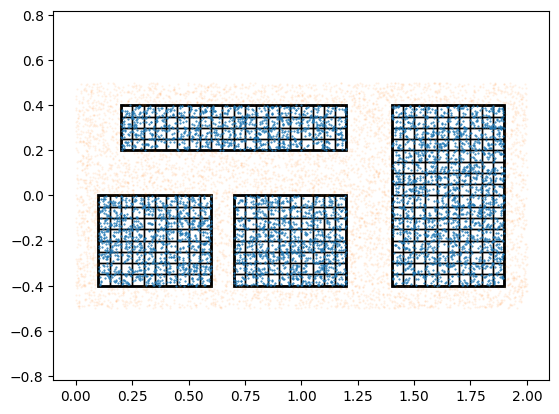

In [74]:
rnd.seed(0)
coord = rnd.uniform(low = (0.0, -0.5), high = (2.0, 0.5), size = (10_000, 2))

patches = [(0.1, -0.4, 0.5, 0.4),
           (0.7, -0.4, 0.5, 0.4),
           (0.2, 0.2, 1.0, 0.2),
           (1.4, -0.4, 0.5, 0.8)]

r = 0.05
cells = []
for patch in patches:
    x = np.arange(0, patch[2] + r, r) 
    x = x[ x <= patch[2] ] + patch[0]

    y = np.arange(0, patch[3] + r, r) 
    y = y[ y <= patch[3] ] + patch[1]

    cells.append((x, y))

patch_id = np.repeat(-1, coord.shape[0])
for i, patch in enumerate(patches):
    x0, y0, w, h = patch
    patch_id[ (x0 <= coord[:,0]) & (coord[:,0] <= x0 + w) & (y0 <= coord[:,1]) & (coord[:,1] <= y0 + h) ] = i


m = (patch_id != -1)
plt.plot(coord[m,0], coord[m,1], 'o', ms = 0.5)
plt.plot(coord[~m,0], coord[~m,1], 'o', ms = 0.5, alpha = 0.1)
plt.axis('equal')
for (x, y), patch in zip(cells, patches):
    rect = mpl_patches.Rectangle(patch[:2], patch[2], patch[3], lw=2, ec='black', fc='none')
    plt.gca().add_patch(rect)

    for xi in x[:-1]:
        for yi in y[:-1]:
            rect = mpl_patches.Rectangle((xi, yi), r, r, lw=1, ec='black', fc='none')
            plt.gca().add_patch(rect)
